In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import re


from analytic.technology import technologies_for_python_developer

In [2]:
df = pd.read_csv('db.csv')

In [3]:
df.sample(10)

,title,company,location,requirements,description,views_count,reviews_count
101,Full Stack Developer (Python),Murano Software,"Іспанія, Україна, Узбекистан","['· Тільки віддалено', '· 5 років досвіду', '·...",We are looking for a skilled Full Stack Develo...,9,227
58,Senior Python Developer,AutoDS,Україна,"['· Product', '· Тільки віддалено', '· 3 роки ...",We are looking for a Senior Python developer f...,17,67
50,Tech/Team Lead (Python),Quantum,"Релокейт, Україна","['· Office або Remote', '· 5 років досвіду', '...",Quantum is a global technology partner deliver...,6,37
150,Senior Python (Django) Developer,Zutobi,"Швеція, Україна","['· Product', '· Тільки віддалено', '· 5 років...",Zutobi is a global edtech product company that...,18,59
67,Senior Python Developer,Numerical Technologies,"Польща, Португалія, Україна","['· Product', '· Office або Remote', '· 5 рокі...",Numerical Technologies is a leading provider o...,9,26
157,"Middle Python/Django developer, full stack (fr...",Itera Research,Україна (Харків),"['· Office або Remote', '· 2 роки досвіду', '·...",We are looking for an experienced Middle Pytho...,16,82
134,Python/Django Engineer,Intobi,Україна (Київ),"['· Office або Remote', '· 3 роки досвіду', '·...",Hey guys 👋\nWe’re Intobi - a software developm...,8,84
54,python developer for algorithmic trading project,NATS,Україна,"['· Product', '· Тільки віддалено', '· 3 роки ...","Ми українська продуктова компанія NATS, заснов...",39,130
156,Python Developer,Ronis Business Tools,Україна,"['· Тільки віддалено', '· 2 роки досвіду']",Наша компанія знаходиться в пошуку колеги - Py...,42,137
129,Python (Django) Developer,PLANEKS,Україна,"['· Тільки віддалено', '· 2 роки досвіду', '· ...",Let’s start with what PLANEKS offers:\n\n0. Fa...,81,263


# Position correction

In [4]:
df.title.unique()

array(['Middle Python Developer', 'Junior Python Developer',
       'Automation QA Middle (Python) Engineer',
       'Senior Django Developer', 'QA Automation Engineer',
       'Middle/ Middle+ Back-end Python Developer', 'Python Engineer',
       'Junior Python Verification Engineer',
       'Senior Python Developer_Competency Lead',
       'Python/Django developer',
       'Middle Python Software Engineer (Prom.ua)',
       'Back-End Python (Django) Developer',
       'Senior Python Backend Engineer', 'Senior Python Engineer',
       'Data and Machine Learning Engineer (Python)',
       'Python Engineer with AI (Computer Vision)', 'Python Developer',
       'AI Developer', 'Senior Python Developer',
       'Bot Developer in the Crypto Sector (Python / Zennoposter)',
       'Python Developer (Разработчик бота у криптосередовищі)',
       'Python Developer (Junior)',
       'Senior Python (Computer Vision) Engineer/Poland or Romania',
       'Django Developer', 'Python/Django Developer

In [5]:
def word_search(words, key_words):
    for word in words.split():
        if word.lower() in key_words:
            return True
    return False

def simplify_decorator(field_and_keywords):
    def decorator(func):
        def wrapper(income):
            income_lower = income.lower()
            for output, key_words in field_and_keywords.items():
                if word_search(income_lower, key_words):
                    return output
            return 'other'
        return wrapper
    return decorator

In [6]:
positions = {
    'data_scientist': ['data', 'vision', 'ai', 'ші', 'інтелект', 'llm', 'nlp', 'timeseries', 'ml', 'cv', 'ml/cv'],
    'full_stack': ['full stack', 'fullstack', 'full-stack'],
    
    'team_lead': ['team', 'team lead', 'lead', 'senior/lead'],
    'middle': ['middle'],
    'senior': ['senior'],
    'junior': ['junior', 'trainee']
}

@simplify_decorator(positions)
def position_simplify(title):
    return title

df['position'] = df['title'].apply(position_simplify)

In [7]:
df[['title', 'position']]

,title,position
0,Middle Python Developer,middle
1,Junior Python Developer,junior
2,Automation QA Middle (Python) Engineer,middle
3,Senior Django Developer,senior
4,QA Automation Engineer,other
...,...,...
193,Tech Lead Data Engineer (Python),data_scientist
194,Junior Python Developer,junior
195,Python developer with Cloud and DevOps experience,other
196,Senior - Regular Python Developer ( EST workin...,senior


In [8]:
df.position.unique()

array(['middle', 'junior', 'senior', 'other', 'team_lead',
       'data_scientist', 'full_stack'], dtype=object)

The "Other" category encompasses positions that lack a specified rank or possess unconventional titles. This includes roles that do not fit into the predefined categories of Junior, Middle, Senior, or other specialized positions. It serves as a catch-all for positions that may have unique or unspecified qualifications, making them distinct from the more clearly defined roles in the dataset.

In [9]:
df[df['position'] == 'other']

,title,company,location,requirements,description,views_count,reviews_count,position
4,QA Automation Engineer,PLVision,"Україна (Київ, Львів, Одеса, Харків)","['· Office або Remote', '· 3 роки досвіду', '·...",We invite a Quality Assurance (QA) Automation ...,4,32,other
5,Middle/ Middle+ Back-end Python Developer,ARENA CS,Україна,"['· Product', '· Тільки віддалено', '· 3 роки ...","Gradus – це продуктова компанія, а це означає:...",19,55,other
6,Python Engineer,Lemberg Solutions,"Релокейт, Україна (Львів)","['· Гібридна робота', '· 3 роки досвіду', '· I...","Lemberg Solutions is, above all, a group of pa...",9,32,other
9,Python/Django developer,Right Link,Україна,"['· Тільки віддалено', '· 1 рік досвіду', '· U...",Tech requirements\n• Python/Django experience\...,129,325,other
11,Back-End Python (Django) Developer,StrimkoSoft,Україна,"['· Тільки віддалено', '· 5 років досвіду', '·...",We are seeking an experienced Python Developer...,38,104,other
...,...,...,...,...,...,...,...,...
187,Python Engineer (OCR and Document Processing),PLANEKS,Україна,"['· Тільки віддалено', '· 2 роки досвіду', '· ...",Let’s start with what PLANEKS offers:\n\n0. Fa...,20,170,other
189,Large Language Model (LLM) Engineer,BVG,"Болгарія, Іспанія, Україна","['· Тільки віддалено', '· 3 роки досвіду', '· ...",We are seeking a dedicated Large Language Mode...,3,28,other
191,Python Developer,OCTY,Естонія,"['· Тільки віддалено', '· 1 рік досвіду', '· U...",About us:\nOur company works with startups - d...,121,408,other
195,Python developer with Cloud and DevOps experience,Luxoft,"Україна (Дніпро, Київ, Одеса)","['· Office або Remote', '· 2 роки досвіду', '·...",Project Description:\nOne of the world's large...,12,67,other


# Position analyze

From the table, it's evident that there is a notable surge in interest from individuals applying for Junior and Middle positions. Interestingly, the data suggests a pattern where, on average, every Junior applicant tends to submit their CV for approximately every fourth vacancy. This observation raises the possibility that either the job requirements for these positions are relatively standard, or there might be instances of widespread application spamming within these categories.

In [10]:
review_stat = df.groupby('position').sum()[['views_count', 'reviews_count']]
review_stat['proportion'] = (review_stat['views_count'] / review_stat['reviews_count'] * 100).__round__(1)
review_stat

,views_count,reviews_count,proportion
position,,,
data_scientist,549,2712,20.2
full_stack,15,261,5.7
junior,1441,5724,25.2
middle,840,3386,24.8
other,2478,10742,23.1
senior,465,2587,18.0
team_lead,48,360,13.3


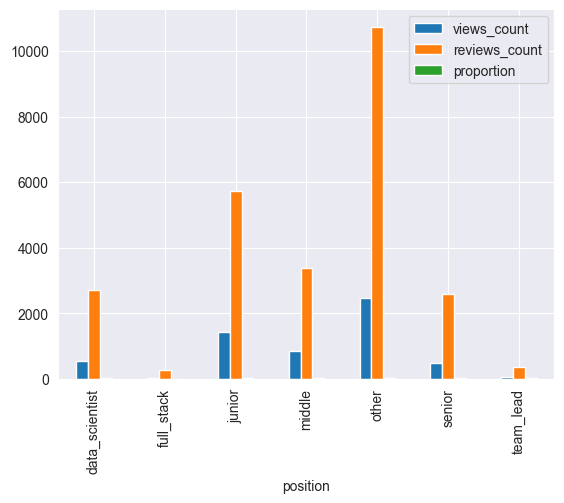

In [11]:
review_stat.plot.bar();

At present moment the most popular vacansy is required scraping skill

In [12]:
df.sort_values(by='views_count', ascending=False)[['title', 'views_count', 'reviews_count', 'requirements']].head(1)

,title,views_count,reviews_count,requirements
70,Data Scrap Specialist (Python),242,715,"['· Product', '· Тільки віддалено', '· Без дос..."


The table reveals that the highest number of job offers corresponds to the roles of Senior and Data Scientist, with the "Other" category excluded. Additionally, a notable pattern emerges where a significant number of companies seek candidates for both Senior and Middle positions, surpassing other combinations. This trend is attributed to instances where a single company has multiple open positions for different experience levels within its workforce requirements.

In [13]:
position_stat = df.groupby('position').nunique()[['title', 'company']]
position_stat

,title,company
position,,
data_scientist,20,18
full_stack,4,4
junior,8,11
middle,14,23
other,55,61
senior,29,32
team_lead,10,10


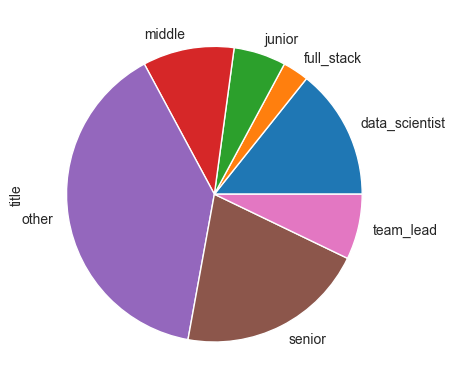

In [14]:
position_stat.title.plot.pie();

# Requirements correction

In [15]:
df.requirements.unique()

array(["['· Тільки віддалено', '· 2 роки досвіду', '· Upper-Intermediate']",
       "['· Product', '· Гібридна робота', '· 1 рік досвіду', '· Pre-Intermediate']",
       "['· Office або Remote', '· 3 роки досвіду', '· Upper-Intermediate']",
       "['· Product', '· Тільки віддалено', '· 3 роки досвіду']",
       "['· Office або Remote', '· 3 роки досвіду', '· Intermediate']",
       "['· Product', '· Тільки віддалено', '· 3 роки досвіду', '· Upper-Intermediate']",
       "['· Гібридна робота', '· 3 роки досвіду', '· Intermediate']",
       "['· Office або Remote', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Тільки віддалено', '· 1 рік досвіду', '· Upper-Intermediate']",
       "['· Product', '· Office або Remote', '· 3 роки досвіду']",
       "['· Тільки віддалено', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Product', '· Office або Remote', '· 5 років досвіду', '· Intermediate']",
       "['· Product', '· Office або Remote', '· 5 років досвіду', '· Upper-

In [16]:
def phrase_search(phrases, text):
    for phrase in phrases:
        if phrase.lower() in text.lower():
            return True
    return False

def simplify_decorator(field_and_keywords):
    def decorator(func):
        def wrapper(income):
            income_lower = income.lower()
            for output, key_phrases in field_and_keywords.items():
                if phrase_search(key_phrases, income_lower):
                    return output
            return np.nan
        return wrapper
    return decorator

type = {
    'only_remote': ['Тільки віддалено'],
    'office_or_remote': ['Office або Remote'],
    'remote': ['Remote'],
    'office': ['Office'],
    'only_office': ['Тільки офіс'],
    'gibryd': ['Гібридна робота']
}

experience = {
    5: ['5'],
    3: ['3'],
    2: ['2'],
    1: ['1'],
    0: ['Без досвіду']
}

english = {
    1: ['Pre-Intermediate'],
    3: ['Upper-Intermediate'],
    2: ['Intermediate'],
    4: ['Advanced/Fluent']
}

@simplify_decorator(type)
def type_simplify(title):
    return title

@simplify_decorator(experience)
def experience_simplify(title):
    return title

@simplify_decorator(english)
def english_simplify(title):
    return title

df['type'] = df['requirements'].apply(type_simplify)
df['experience'] = df['requirements'].apply(experience_simplify)
df['english'] = df['requirements'].apply(english_simplify)

# Requirements analytic

In [17]:
cleaned_df = df[['views_count','reviews_count','position','type','experience','english']]
cleaned_df

,views_count,reviews_count,position,type,experience,english
0,14,74,middle,only_remote,2,3.0
1,46,213,junior,gibryd,1,1.0
2,7,28,middle,office_or_remote,3,3.0
3,22,55,senior,only_remote,3,NaN
4,4,32,other,office_or_remote,3,2.0
...,...,...,...,...,...,...
193,16,70,data_scientist,office_or_remote,3,2.0
194,121,471,junior,only_remote,2,1.0
195,12,67,other,office_or_remote,2,3.0
196,14,91,senior,office_or_remote,3,3.0


When a job requires less proficiency in English, it tends to attract a higher number of candidates applying for that position.

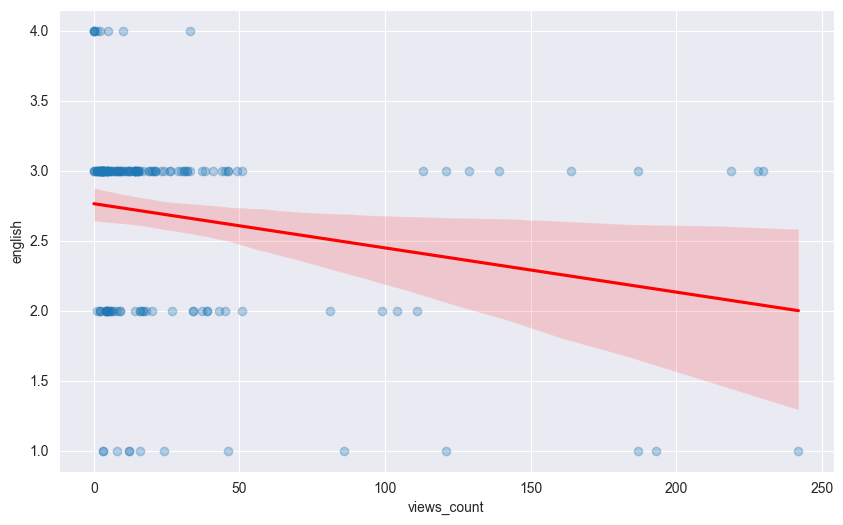

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='views_count', y='english', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

In 75% situation good English is not required for Juniors and mean level is around Intermediate or less

In [19]:
cleaned_df.groupby('position')['english'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
data_scientist,18.0,2.7,0.8,1.0,2.0,3.0,3.0,4.0
full_stack,4.0,2.8,0.5,2.0,2.8,3.0,3.0,3.0
junior,9.0,1.8,0.8,1.0,1.0,2.0,2.0,3.0
middle,22.0,2.6,0.7,1.0,2.0,3.0,3.0,4.0
other,67.0,2.7,0.6,1.0,2.0,3.0,3.0,4.0
senior,46.0,2.8,0.5,1.0,3.0,3.0,3.0,4.0
team_lead,10.0,2.9,0.9,1.0,3.0,3.0,3.0,4.0


In [20]:
cleaned_df.groupby('position')['experience'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
data_scientist,21.0,3.4,2.0,0.0,2.0,5.0,5.0,5.0
full_stack,5.0,4.2,1.1,3.0,3.0,5.0,5.0,5.0
junior,11.0,1.0,0.9,0.0,0.5,1.0,1.0,3.0
middle,25.0,2.6,0.8,1.0,2.0,3.0,3.0,5.0
other,77.0,3.0,1.3,0.0,2.0,3.0,3.0,5.0
senior,49.0,4.3,1.0,2.0,3.0,5.0,5.0,5.0
team_lead,10.0,4.8,0.6,3.0,5.0,5.0,5.0,5.0


Surprise! To find the job the best position is Senior

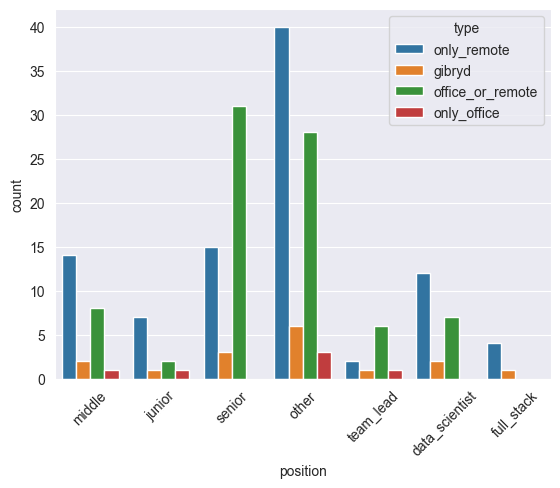

In [21]:
sns.countplot(data=cleaned_df, x='position', hue='type')
plt.xticks(rotation=45);

# Description analytic

In [22]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    return text


def utils_preprocess_text(text, flg_stemm=True, flg_lemm=True, lst_stopwords=None):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    lst_text = text.split()
    lst_text = [word for word in lst_text if word not in lst_stopwords]
    if flg_stemm:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
    if flg_lemm:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
    text = " ".join(lst_text)
    return text


def count_words(text):
    text = text.split()
    text = [word.lower() for word in text]
    text = set(text)
    return text

In [23]:
nltk.download('stopwords')
stopwords_en = stopwords.words('english')


def find_most_common_words(text):
    text = remove_punctuation(text)
    text = utils_preprocess_text(text, lst_stopwords=stopwords_en)
    text = count_words(text)
    return text
    

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [24]:
df.description[7]

"We invite a skilled Firmware Python Verification Engineer with up to 2 years of experience in Quality Assurance and Python programming language to join PLVision. In this role, you will ensure the quality and reliability of our customers' products. You will work closely with hardware engineers to ensure seamless integration between firmware and networking equipment.\n\nAt PLVision, we offer numerous opportunities to secure your career development while working in a thriving Ukrainian company with an in-demand specialization. We work with the latest technologies and contribute to open source, collaborating with professionals from Microsoft, Intel, Cisco, NVIDIA, Meta and more. If you are seeking a long-term project in a future-proof technology domain, apply for this vacancy and become part of our expert team.\n\nAbout PLVision\n\nWe are a software product development company specializing in computer networking and embedded systems. PLVision has offices in Krakow, Poland, and in Ukraine:

In [25]:
find_most_common_words(df.description[7])

{'2',
 '2007',
 'advoc',
 'agilescrum',
 'ambiti',
 'analysi',
 'analyt',
 'appli',
 'assur',
 'autom',
 'bachelor',
 'basic',
 'becom',
 'best',
 'career',
 'case',
 'ci',
 'cisco',
 'close',
 'collabor',
 'commun',
 'compani',
 'comput',
 'continu',
 'contribut',
 'cooper',
 'countri',
 'current',
 'custom',
 'debug',
 'degre',
 'design',
 'develop',
 'domain',
 'eg',
 'embed',
 'emphasi',
 'emul',
 'engin',
 'english',
 'ensur',
 'environ',
 'equip',
 'eu',
 'exist',
 'experi',
 'expert',
 'firmwar',
 'found',
 'futureproof',
 'gerrit',
 'good',
 'hardwar',
 'help',
 'higher',
 'identifi',
 'implement',
 'indemand',
 'industri',
 'innov',
 'integr',
 'intel',
 'intermedi',
 'intern',
 'invit',
 'israel',
 'jenkin',
 'join',
 'kharkiv',
 'knowledg',
 'krakow',
 'kyiv',
 'languag',
 'latest',
 'launch',
 'leader',
 'level',
 'linux',
 'longterm',
 'lviv',
 'manag',
 'meta',
 'methodolog',
 'microsoft',
 'must',
 'network',
 'new',
 'numer',
 'nvidia',
 'objectori',
 'odesa',
 'offer',

# Skills counter

In [26]:
def skills_intersection(text):
    text = find_most_common_words(text)
    return text.intersection(technologies_for_python_developer)

In [27]:
df['skills'] = df.description.apply(skills_intersection)

In [28]:
df[['position', 'skills']]

,position,skills
0,middle,"{django, kubernet, sql, rest, nosql, english, ..."
1,junior,"{postgresql, git, sql, rest, mysql}"
2,middle,"{kubernet, http, english, docker}"
3,senior,"{postgresql, git, django, rest, mysql}"
4,other,"{dash, pytest, linux, english}"
...,...,...
193,data_scientist,"{pytorch, django, sql, docker, tensorflow, linux}"
194,junior,"{django, sql, fastapi, english, flask}"
195,other,"{git, kubernet, rest, docker, linux}"
196,senior,"{sql, english}"


In [29]:
def skills_by_year(df):
    all_skills = [skill for skills_set in df['skills'] for skill in skills_set]
    skills_counter = Counter(all_skills)
    result_df = pd.DataFrame(list(skills_counter.items()), columns=['Skill', 'Count'])
    result_df.sort_values(by='Count', ascending=False, inplace=True)
    return result_df

In [30]:
def build_barplot(df):    
    plt.figure(figsize=(16, 6))
    sns.barplot(data=df[1:], x='Skill', y='Count')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
def main_build_graph_by_year(year):
    one_year = df[df['experience'] == year]
    one_year = skills_by_year(one_year)
    build_barplot(one_year)

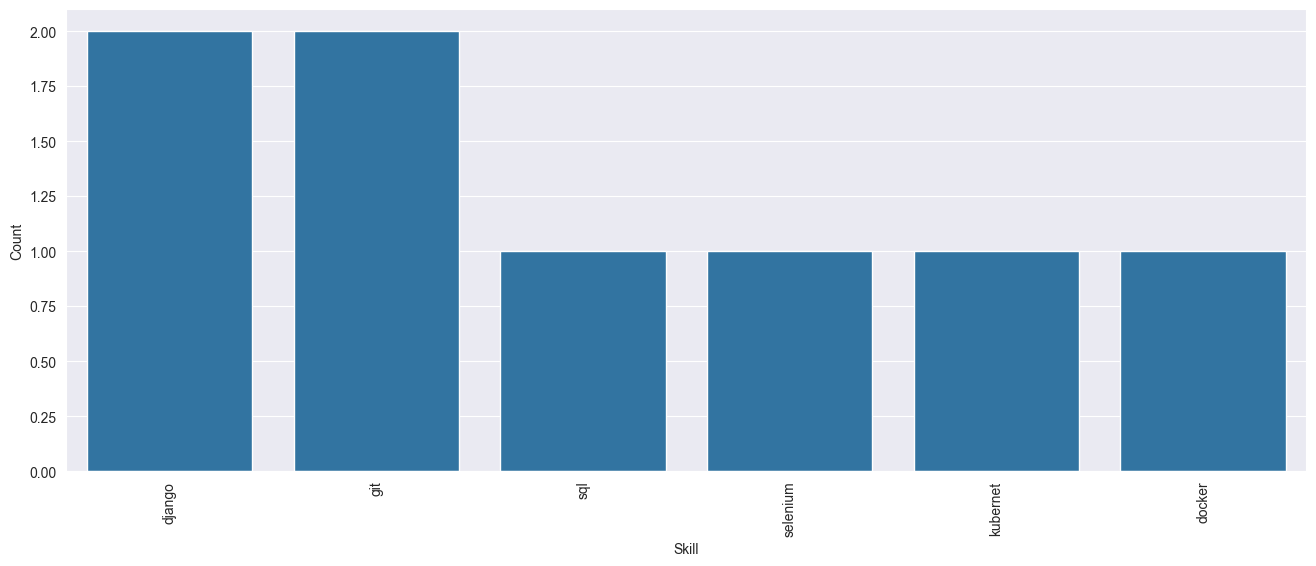

In [32]:
main_build_graph_by_year(0)

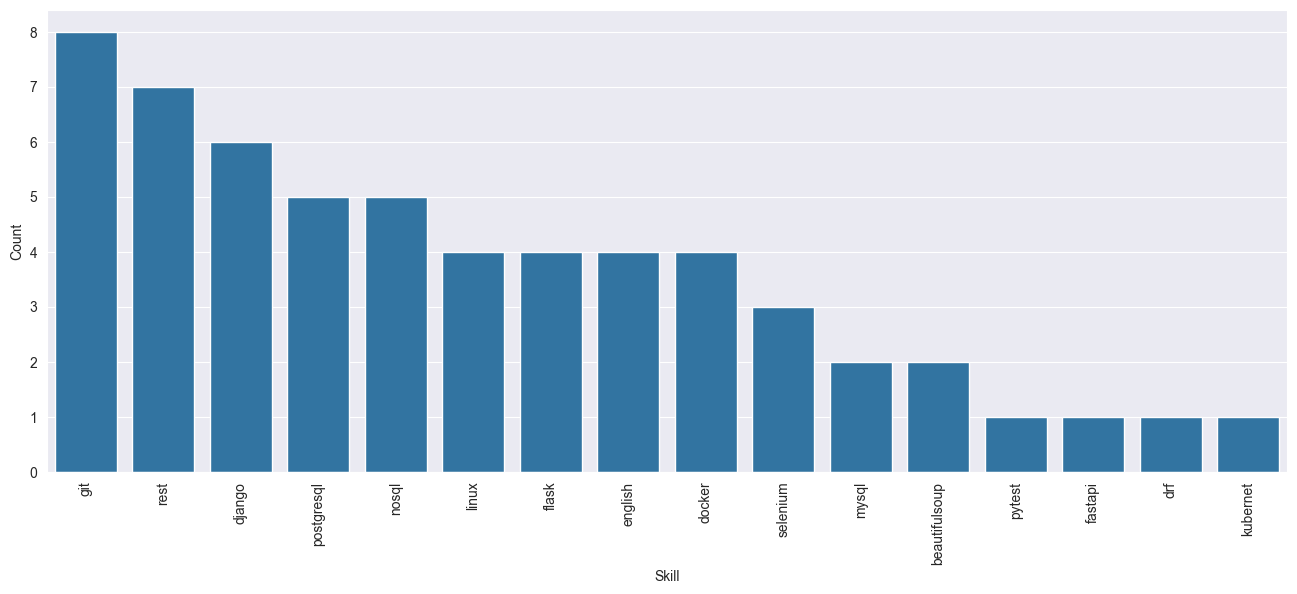

In [33]:
main_build_graph_by_year(1)

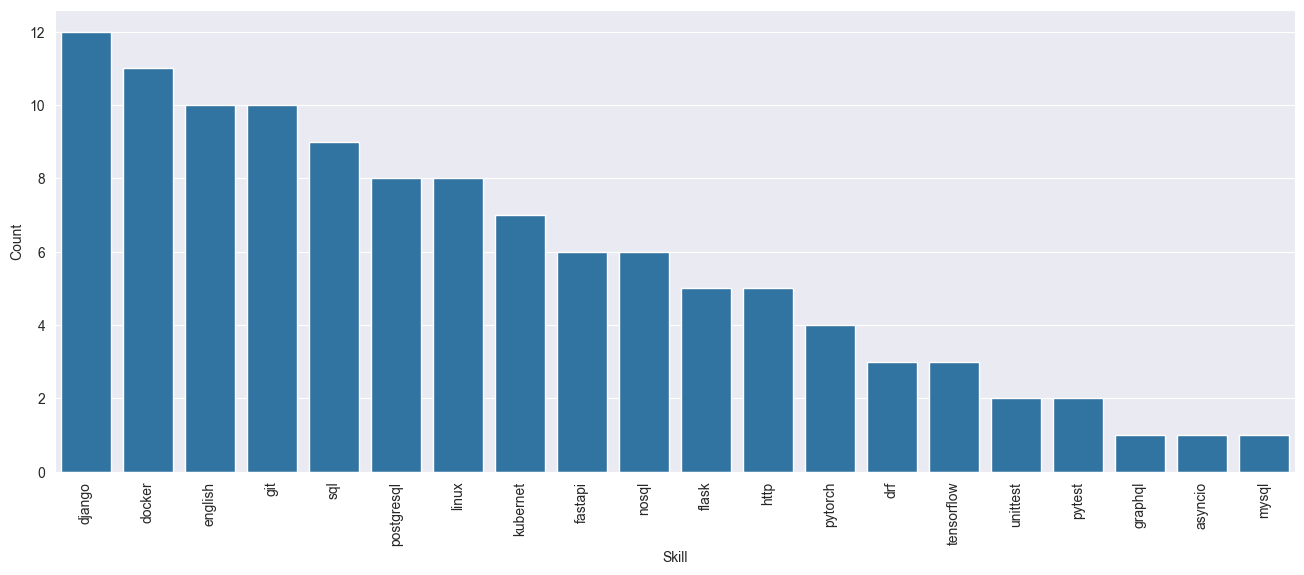

In [34]:
main_build_graph_by_year(2)

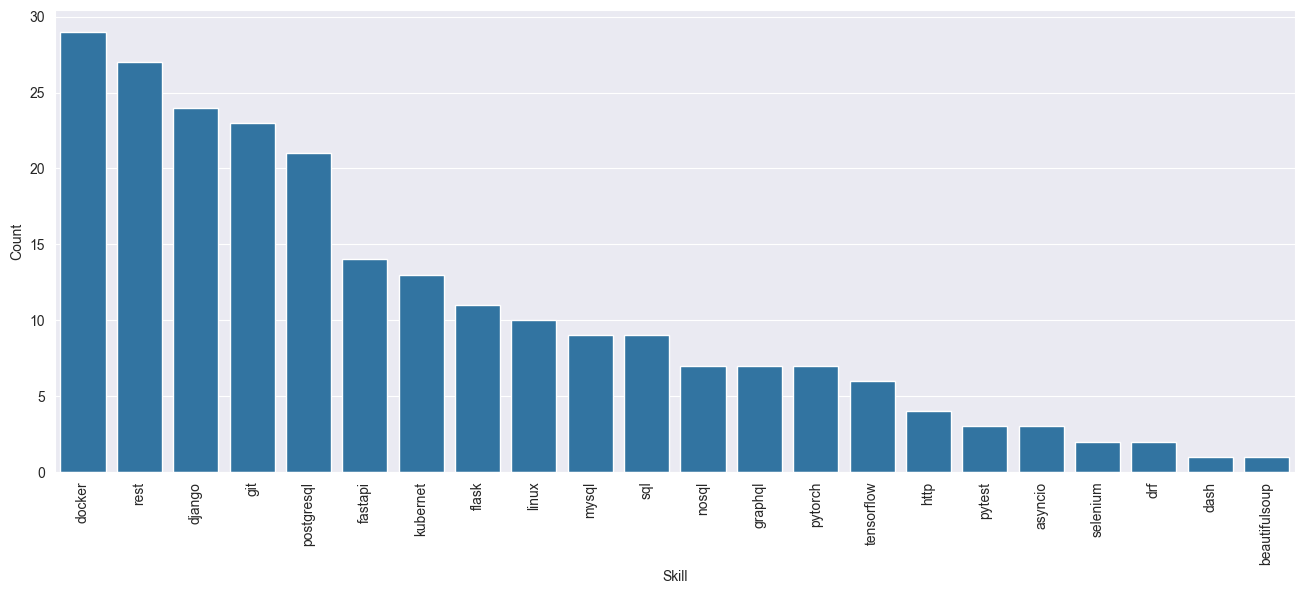

In [35]:
main_build_graph_by_year(3)

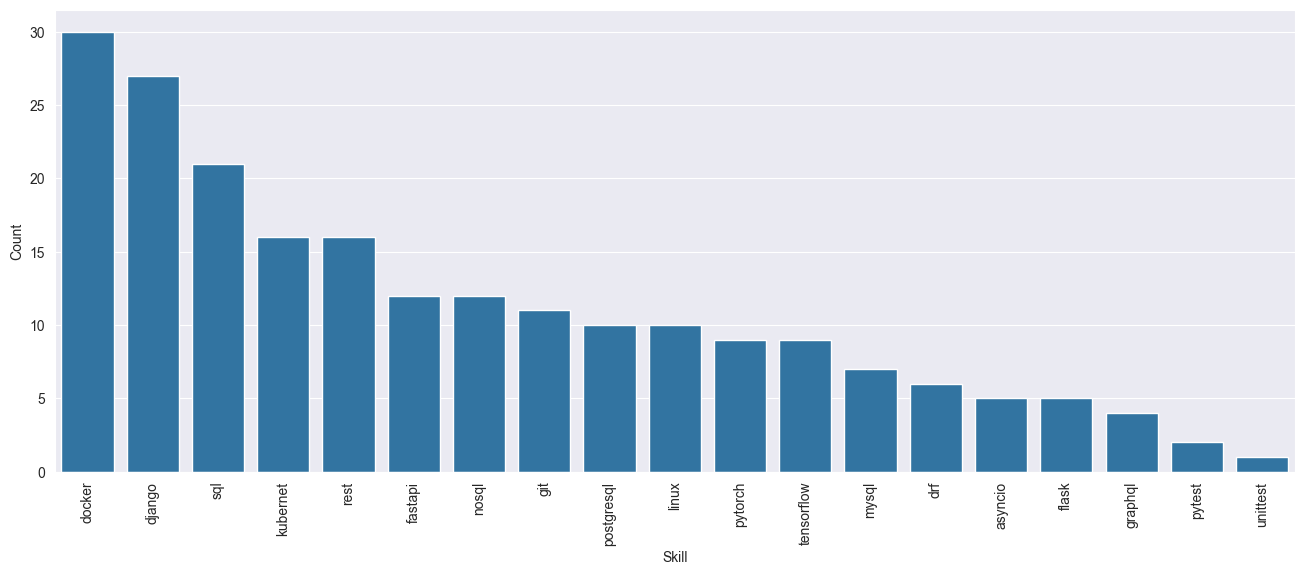

In [36]:
main_build_graph_by_year(5)

In [37]:
df['skills_count'] = df['skills'].apply(lambda x: len(x))

In [38]:
df

,title,company,location,requirements,description,views_count,reviews_count,position,type,experience,english,skills,skills_count
0,Middle Python Developer,Starnavi,Україна,"['· Тільки віддалено', '· 2 роки досвіду', '· ...",REQUIRED SKILLS:\n- 2+ years experience with P...,14,74,middle,only_remote,2,3.0,"{django, kubernet, sql, rest, nosql, english, ...",9
1,Junior Python Developer,Cosmonova Broadcast,Україна (Київ),"['· Product', '· Гібридна робота', '· 1 рік до...",Cosmonova Broadcast - це IT і High Tech для ме...,46,213,junior,gibryd,1,1.0,"{postgresql, git, sql, rest, mysql}",5
2,Automation QA Middle (Python) Engineer,Delphi Software,"Україна (Вінниця, Київ)","['· Office або Remote', '· 3 роки досвіду', '·...",Perimeter 81 is expanding team for development...,7,28,middle,office_or_remote,3,3.0,"{kubernet, http, english, docker}",4
3,Senior Django Developer,Encomane,Україна,"['· Product', '· Тільки віддалено', '· 3 роки ...",Клієнт:\nКонсалтингова та аудиторська компанія...,22,55,senior,only_remote,3,NaN,"{postgresql, git, django, rest, mysql}",5
4,QA Automation Engineer,PLVision,"Україна (Київ, Львів, Одеса, Харків)","['· Office або Remote', '· 3 роки досвіду', '·...",We invite a Quality Assurance (QA) Automation ...,4,32,other,office_or_remote,3,2.0,"{dash, pytest, linux, english}",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Tech Lead Data Engineer (Python),FF Group,"Чехія, Україна (Київ)","['· Product', '· Office або Remote', '· 3 роки...",Required work experience: 3–6 years\nType of e...,16,70,data_scientist,office_or_remote,3,2.0,"{pytorch, django, sql, docker, tensorflow, linux}",6
194,Junior Python Developer,CheckLab,"Велика Британія, Сполучені Штати","['· Product', '· Тільки віддалено', '· 2 роки ...",You should be able to pick some code and under...,121,471,junior,only_remote,2,1.0,"{django, sql, fastapi, english, flask}",5
195,Python developer with Cloud and DevOps experience,Luxoft,"Україна (Дніпро, Київ, Одеса)","['· Office або Remote', '· 2 роки досвіду', '·...",Project Description:\nOne of the world's large...,12,67,other,office_or_remote,2,3.0,"{git, kubernet, rest, docker, linux}",5
196,Senior - Regular Python Developer ( EST workin...,Luxoft,Україна,"['· Office або Remote', '· 3 роки досвіду', '·...",Project Description:\nApplying to the position...,14,91,senior,office_or_remote,3,3.0,"{sql, english}",2


# Cluster

In [39]:
df.dropna(inplace=True)

In [40]:
df_cluster = df[['position', 'skills_count', 'experience', 'english', 'views_count', 'reviews_count']]
df_cluster

,position,skills_count,experience,english,views_count,reviews_count
0,middle,9,2,3.0,14,74
1,junior,5,1,1.0,46,213
2,middle,4,3,3.0,7,28
4,other,4,3,2.0,4,32
5,other,3,3,3.0,19,55
...,...,...,...,...,...,...
192,middle,3,2,2.0,27,182
193,data_scientist,6,3,2.0,16,70
194,junior,5,2,1.0,121,471
195,other,5,2,3.0,12,67


In [41]:
df_cluster.set_index('position', inplace=True)

In [42]:
df_cluster

,skills_count,experience,english,views_count,reviews_count
position,,,,,
middle,9,2,3.0,14,74
junior,5,1,1.0,46,213
middle,4,3,3.0,7,28
other,4,3,2.0,4,32
other,3,3,3.0,19,55
...,...,...,...,...,...
middle,3,2,2.0,27,182
data_scientist,6,3,2.0,16,70
junior,5,2,1.0,121,471


In [43]:
from cluster_tool.main import Cluster

In [44]:
cl = Cluster(df_cluster)

In [45]:
cl.preprocessing()

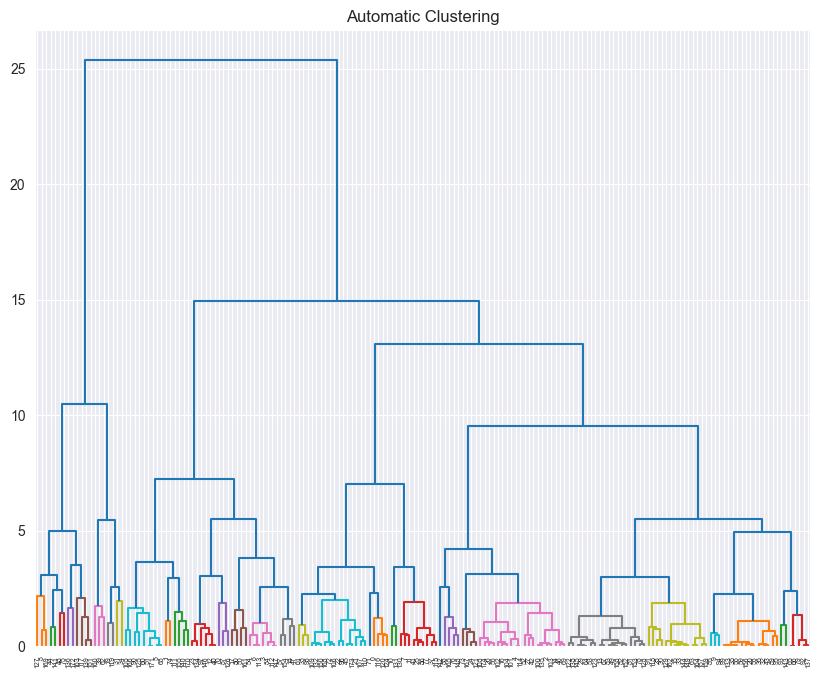

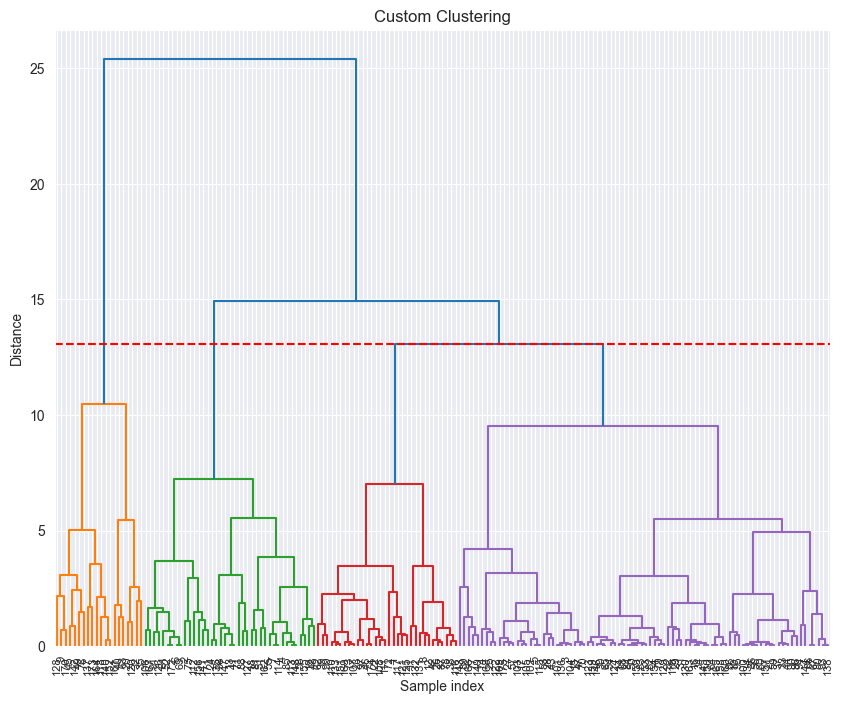

In [46]:
cl.dendrogram(n_clusters=4)

  0%|          | 0/3 [00:00<?, ?it/s]

n_clusters = 4 ssd = 364.1 average silhouette_score = 0.276


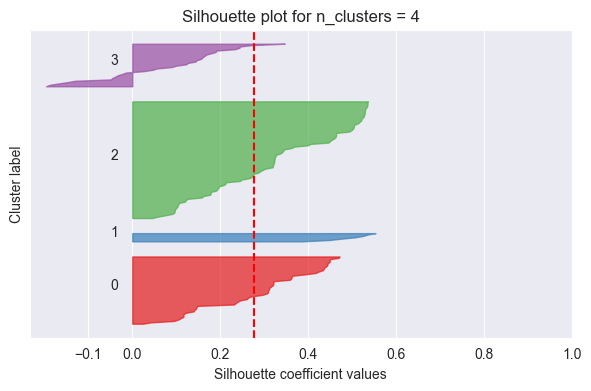

 33%|███▎      | 1/3 [00:00<00:00,  2.88it/s]

n_clusters = 5 ssd = 307.3 average silhouette_score = 0.309


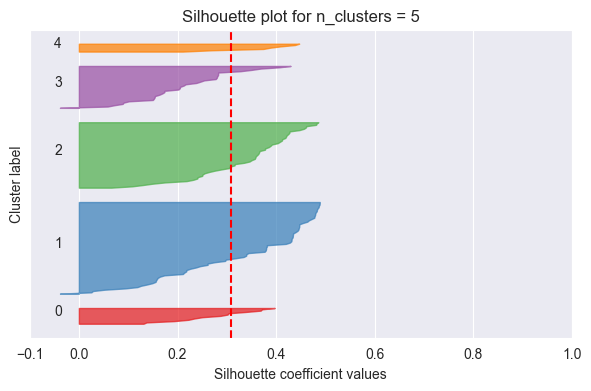

n_clusters = 6 ssd = 243.7 average silhouette_score = 0.322


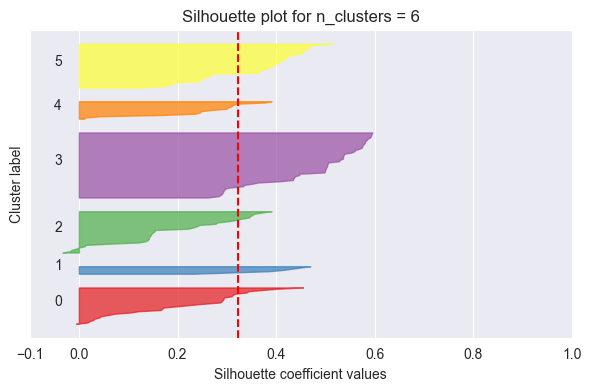

100%|██████████| 3/3 [00:00<00:00,  5.78it/s]


,4,5,6
ssd,364.100,307.300,243.700
silhouette,0.276,0.309,0.322
diff,NaN,NaN,NaN


In [47]:
cl.kmean_knife(min_cluster=4, max_cluster=7)

100%|██████████| 6/6 [00:00<00:00, 368.48it/s]


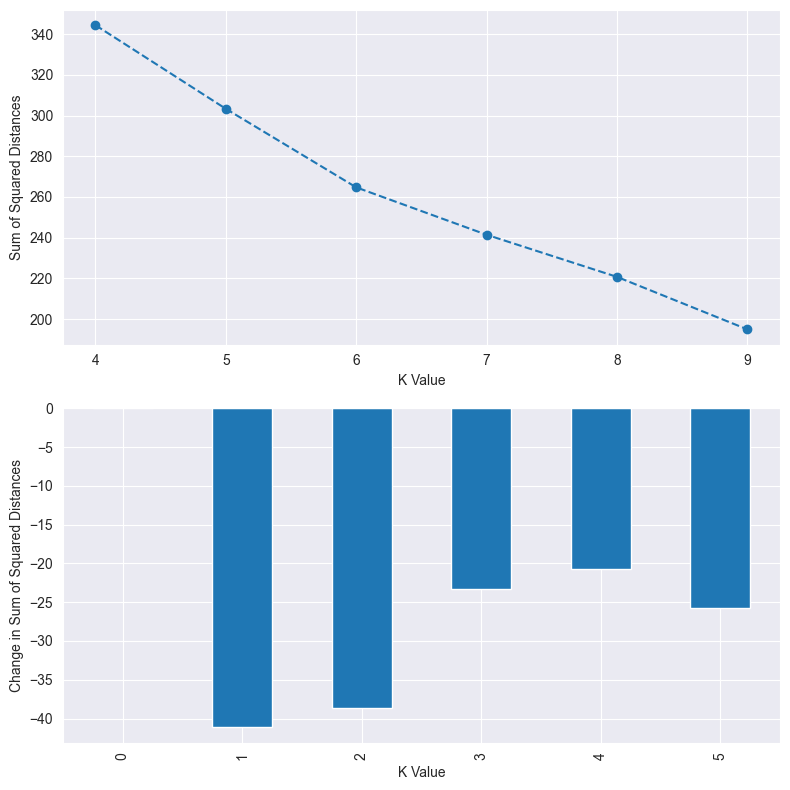

,0,1,2,3,4,5
n_clusters,4.000,5.000,6.000,7.000,8.000,9.000
ssd,344.400,303.300,264.700,241.400,220.700,194.900
silhouette,0.301,0.295,0.334,0.299,0.292,0.322
diff,NaN,-41.100,-38.600,-23.300,-20.700,-25.800


In [48]:
cl.kmean_mount(4,10)

100%|██████████| 10/10 [00:00<00:00, 441.06it/s]


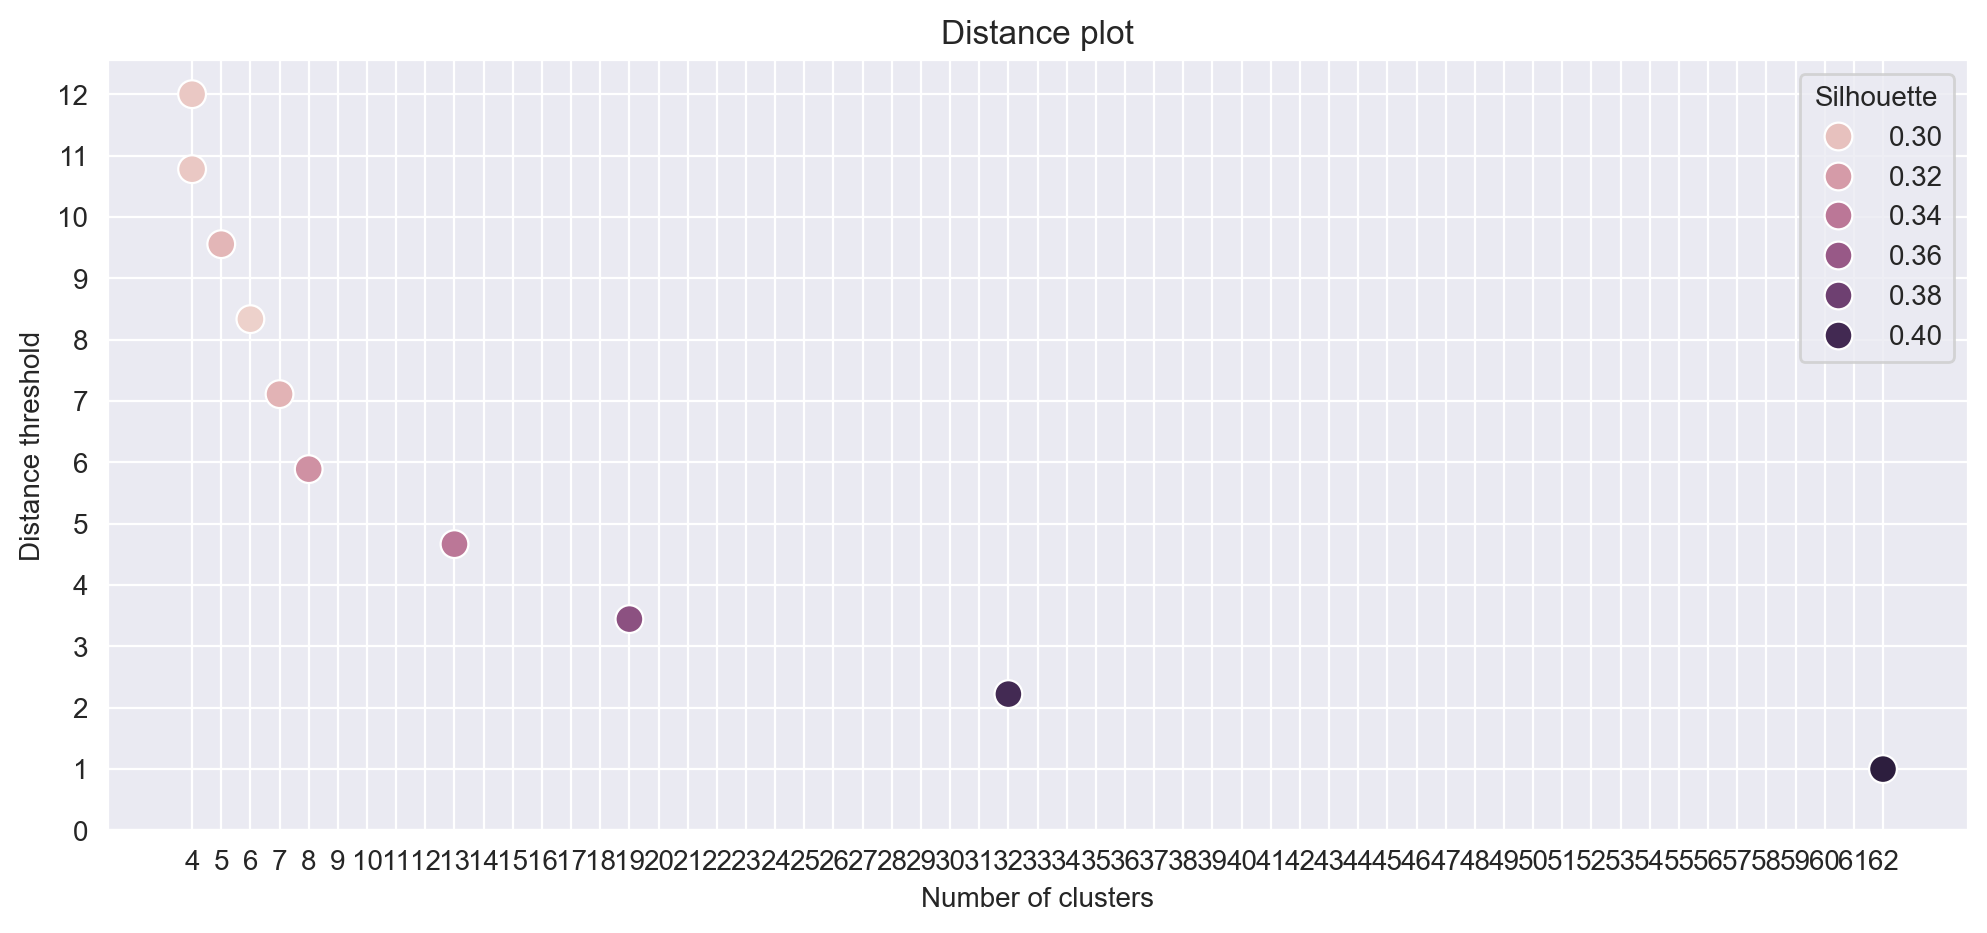

,0,1,2,3,4,5,6,7,8,9
number_of_clusters,62.00,32.000000,19.000000,13.000000,8.000000,7.000000,6.000000,5.000000,4.000000,4.000
distance_threshold,1.00,2.222222,3.444444,4.666667,5.888889,7.111111,8.333333,9.555556,10.777778,12.000
silhouette,0.41,0.399000,0.366000,0.340000,0.325000,0.307000,0.291000,0.305000,0.296000,0.296


In [49]:
cl.agglo_distance(max_distance_threshold=12)

In [50]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=4, random_state=42)
cluster_labels = cluster.fit_predict(df_cluster)
df['cluster'] = cluster_labels

/Users/aleksejkitajskij/Desktop/MA_projects/djinni_statistic/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='reviews_count', ylabel='views_count'>

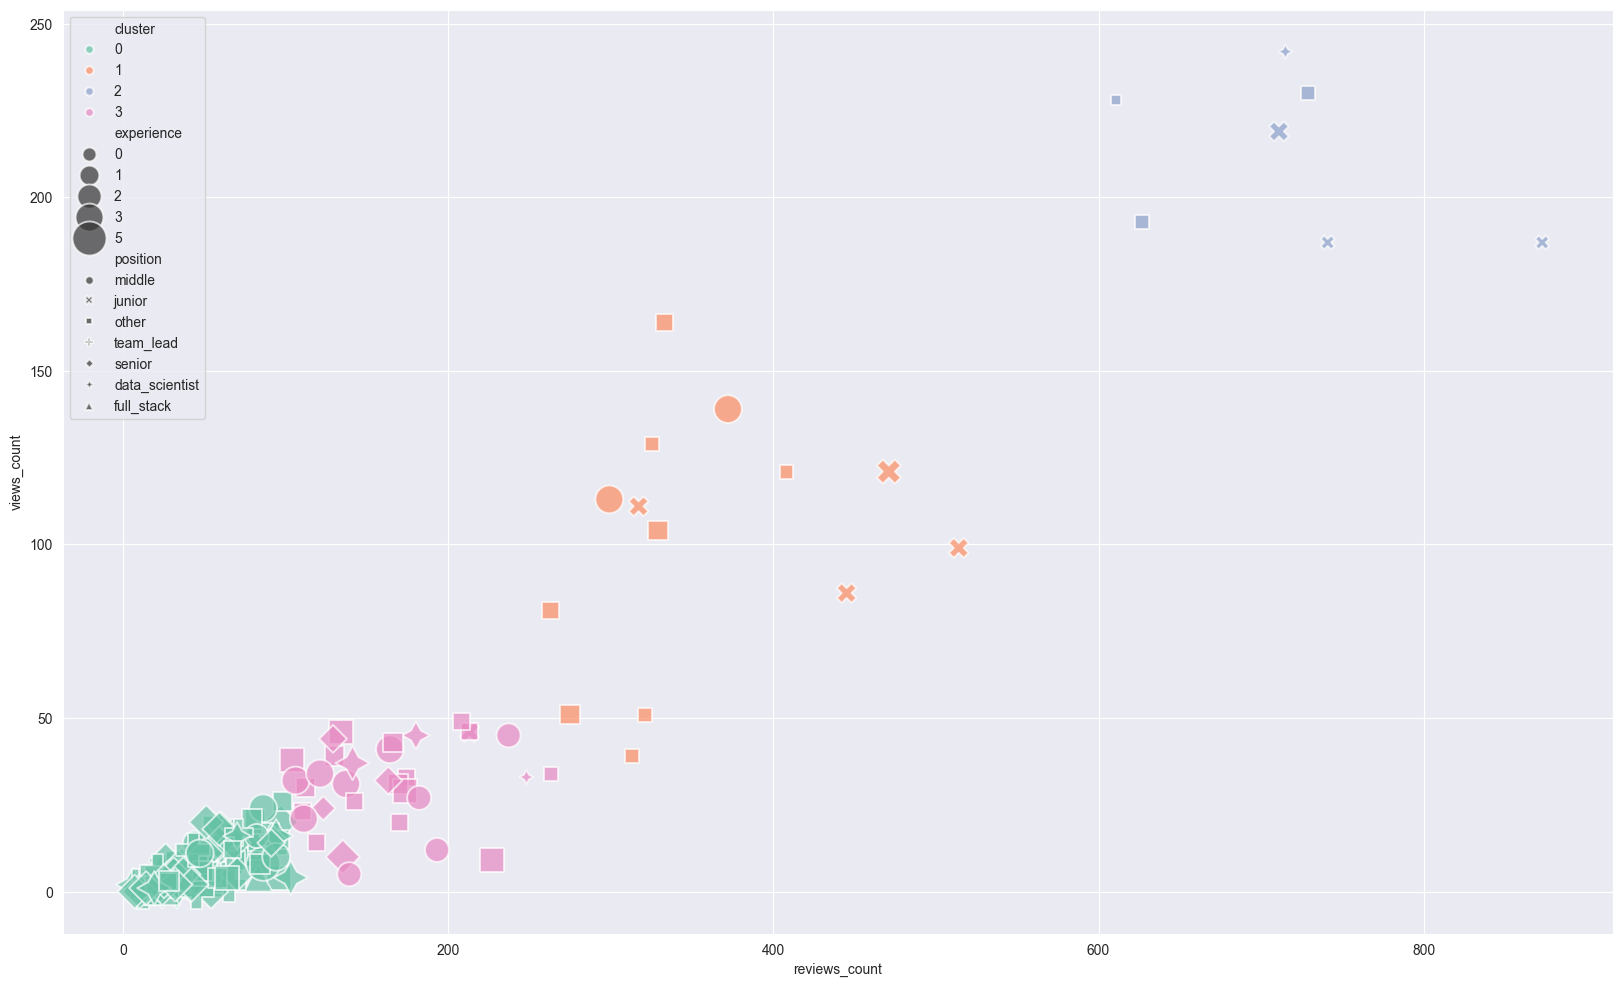

In [51]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data=df, x='reviews_count', y='views_count', 
                hue='cluster', palette='Set2', sizes=(100, 600),
                size='experience', alpha=0.7, style='position',
                )

In [52]:
def cluster_plot(df):
    plt.figure(figsize=(20, 12))
    sns.scatterplot(data=df, x='reviews_count', y='views_count', 
                    hue='english', palette='Set2', sizes=(100, 600),
                    size='experience', alpha=0.7, style='position')

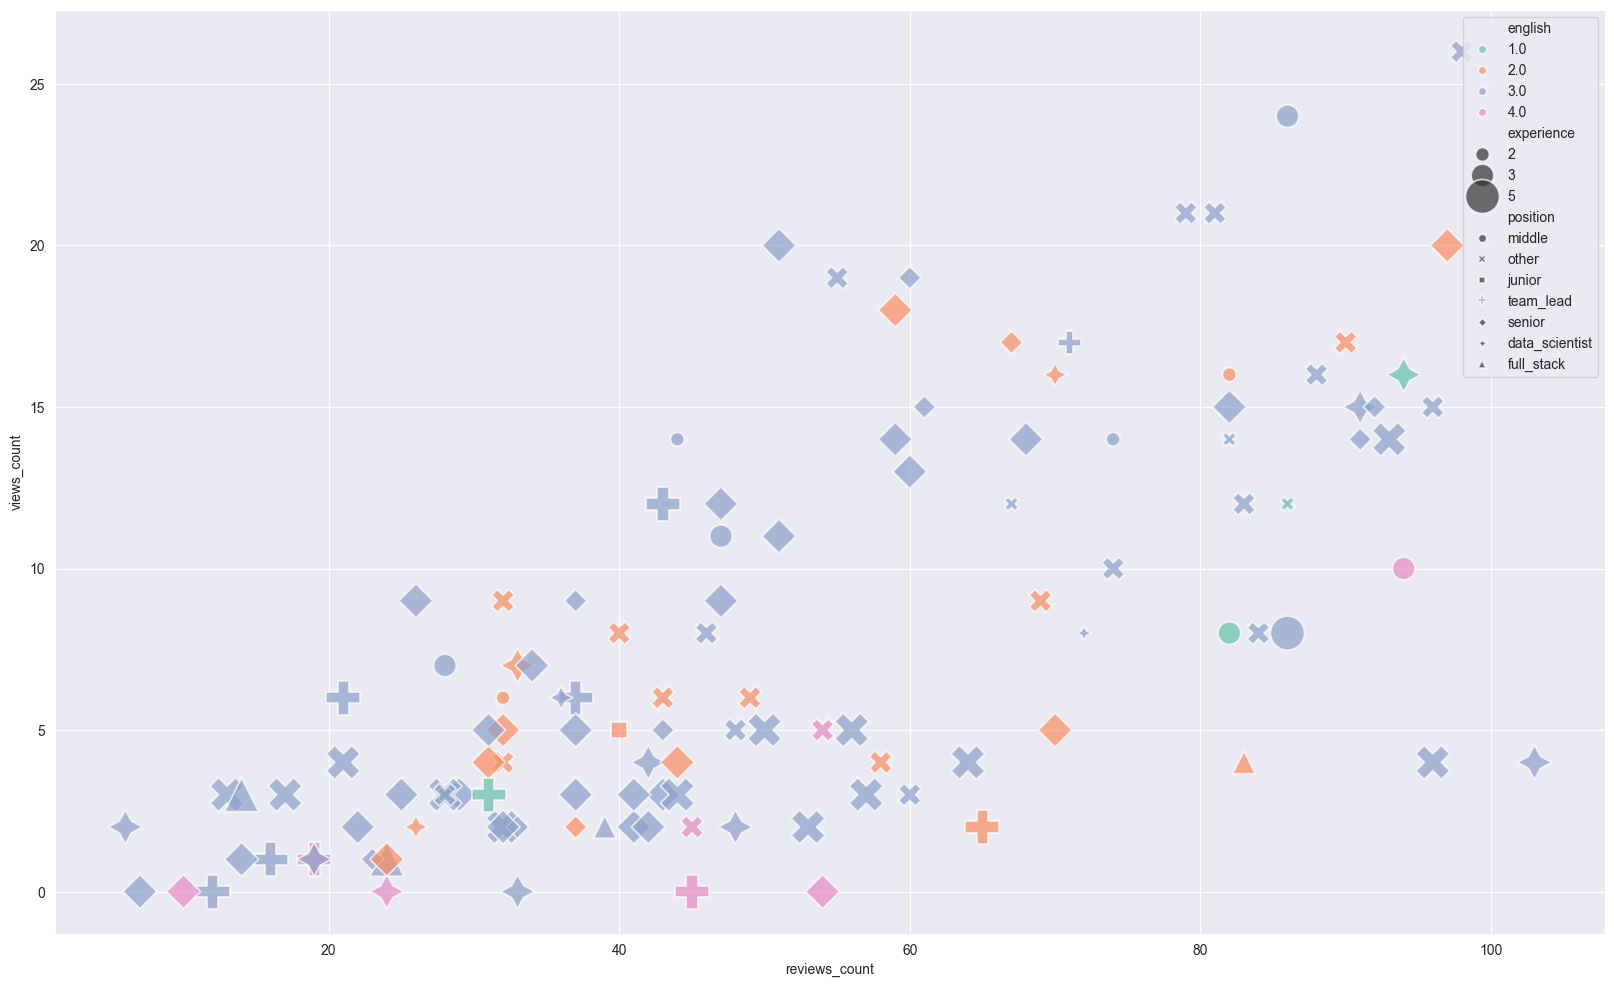

In [53]:
cluster_0 = df[df['cluster'] == 0]
cluster_plot(cluster_0)

# This Cluster shows the best ration between popularity from candidate and requirements hardness. So for HR it's the best cluster to find the candidate posting vacancy  with 2 year expirience and Intermediate English level

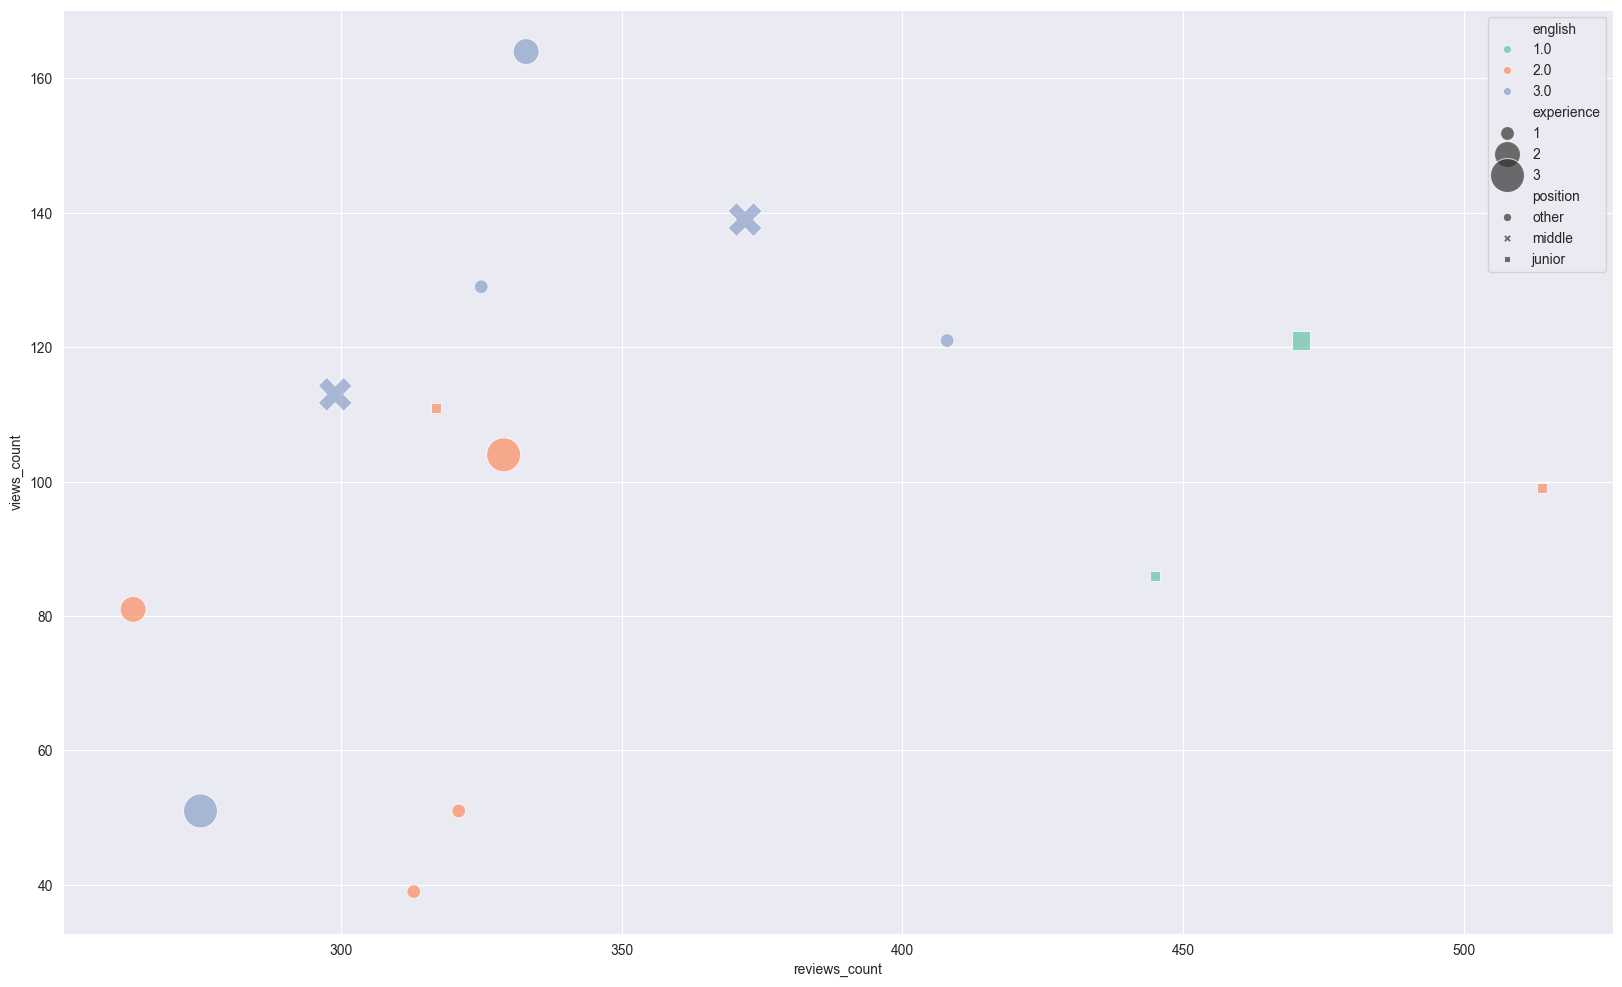

In [54]:
cluster_1 = df[df['cluster'] == 1]
cluster_plot(cluster_1)

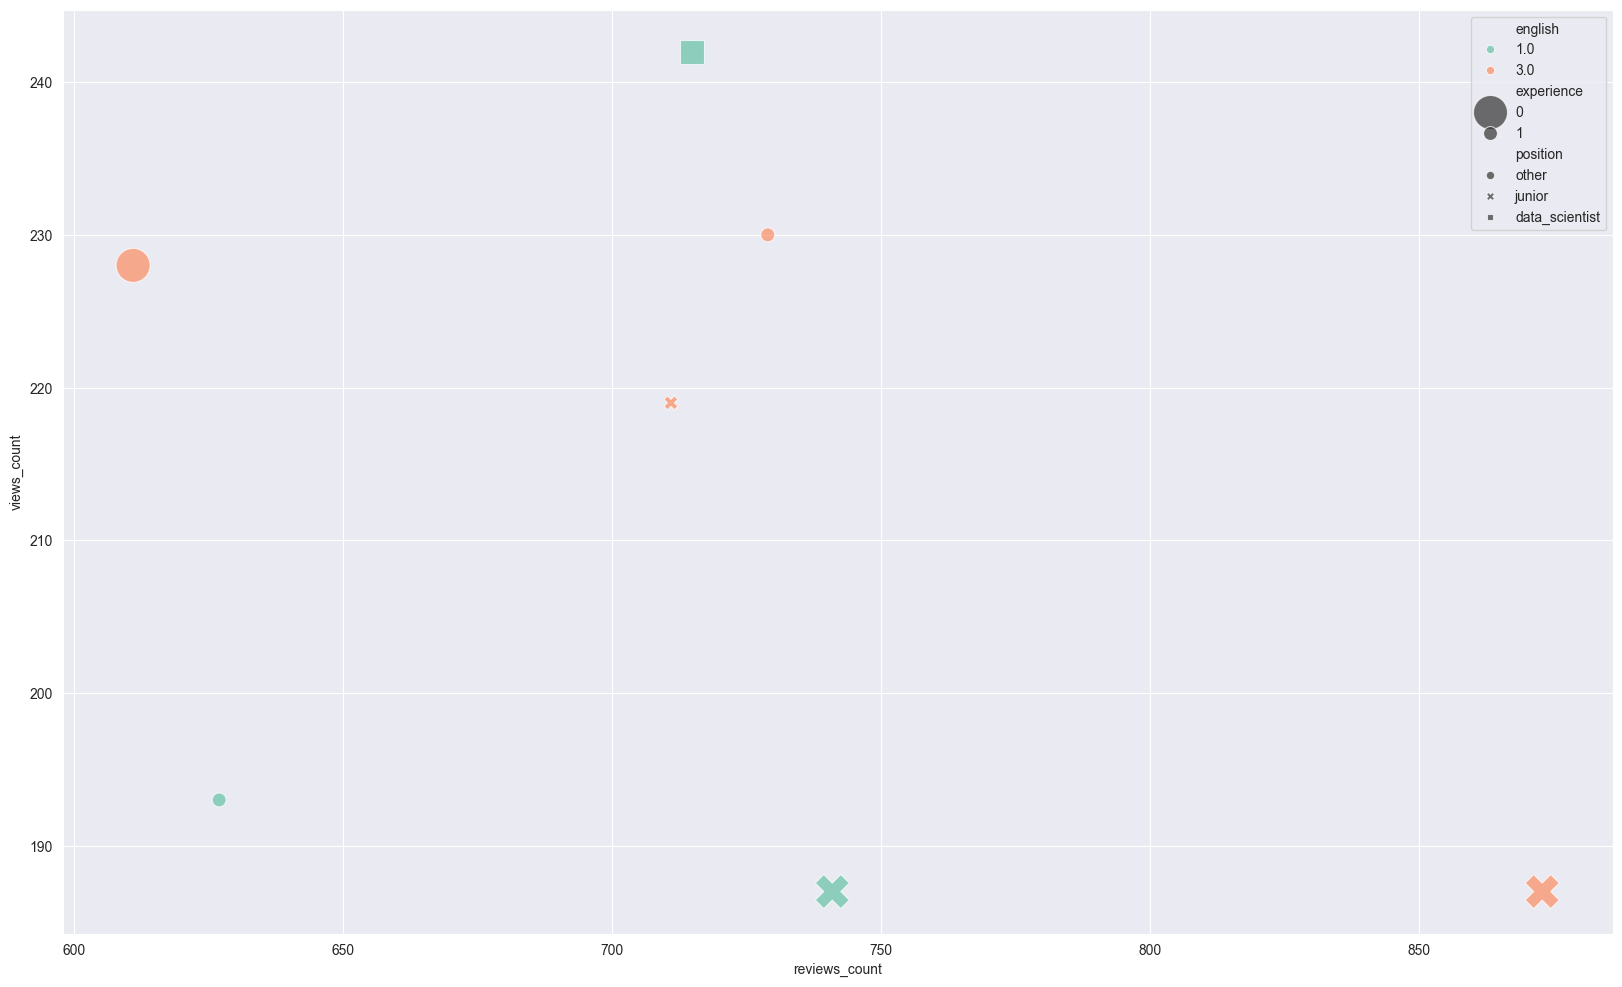

In [55]:
cluster_2 = df[df['cluster'] == 2]
cluster_plot(cluster_2)

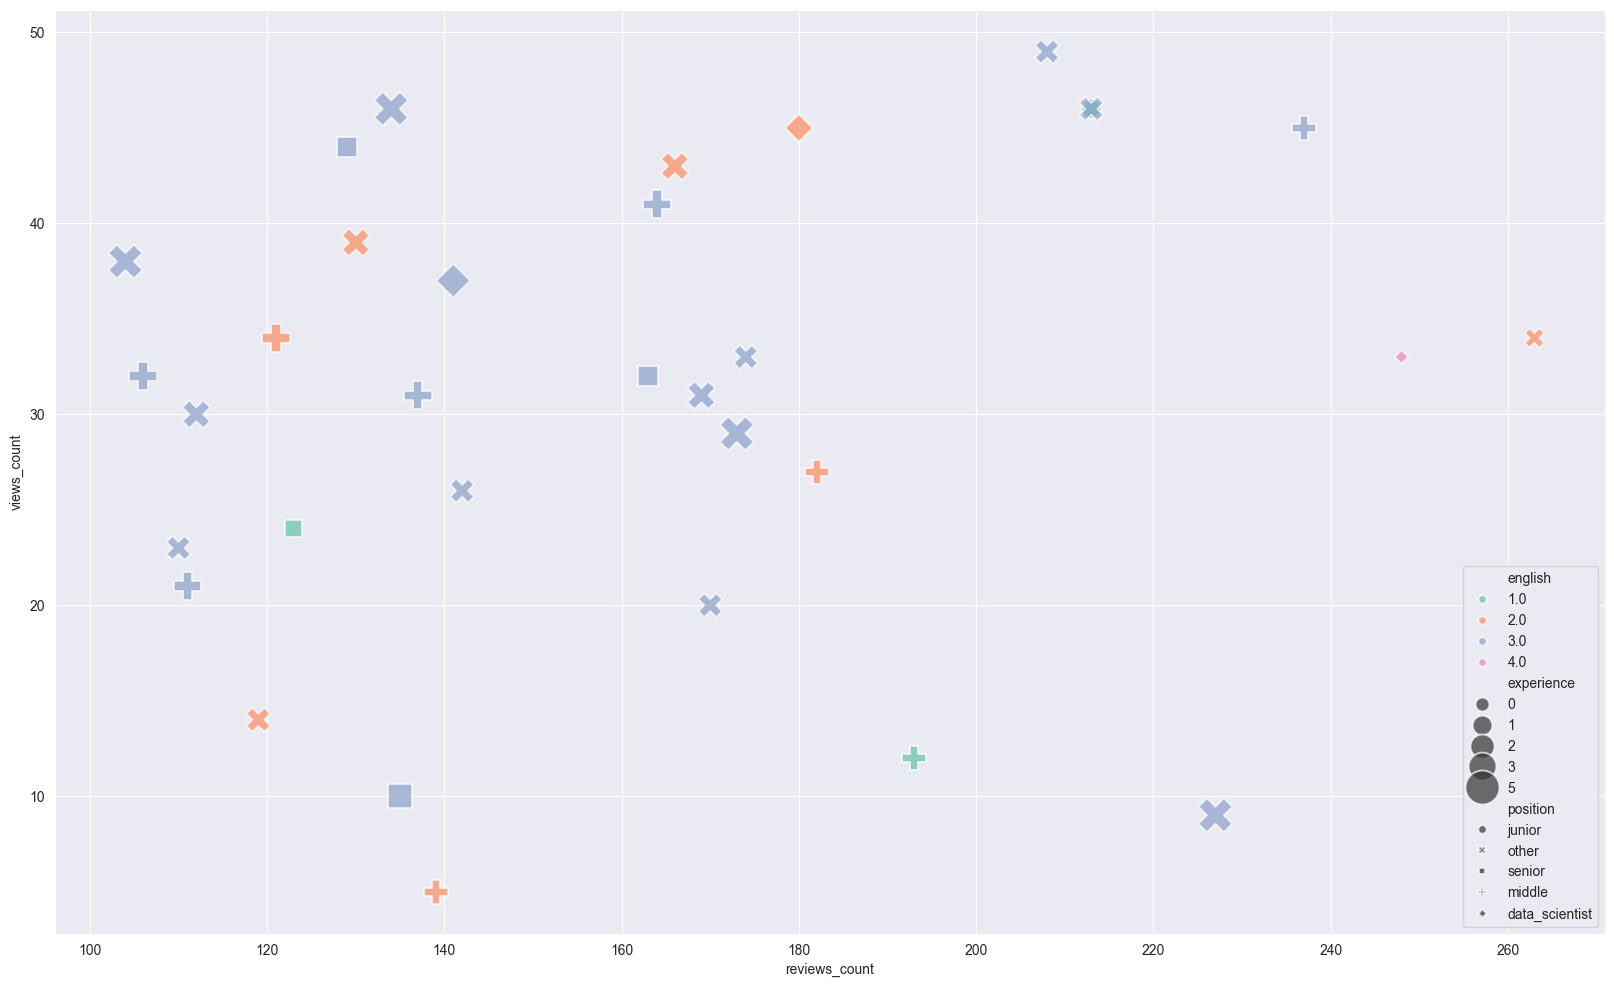

In [56]:
cluster_3 = df[df['cluster'] == 3]
cluster_plot(cluster_3)

# Correlation

In [67]:
df_corr = df[['views_count', 'reviews_count', 'skills_count', 'experience', 'english', 'cluster', 'position']]

In [68]:
df_corr.position.replace({'other': 0, 'junior': 1, 'middle': 2, 'senior': 3, 'team_lead': 4, 'full_stack': 5, 'data_scientist': 6}, inplace=True)

/var/folders/7x/q4zhf1wx08z6l2f4bqz5b8dc0000gn/T/ipykernel_69576/2371688140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.position.replace({'other': 0, 'junior': 1, 'middle': 2, 'senior': 3, 'team_lead': 4, 'full_stack': 5, 'data_scientist': 6}, inplace=True)


In [69]:
df_corr = df_corr[df['position'] != 'other']

## As per this heatmap for higher position required less skills and more experience. So it is better to focus for better learn of smaller amount of skills but more deep

## Candidate is not afraid of high position or english level but less freaquently apply for role with big experience

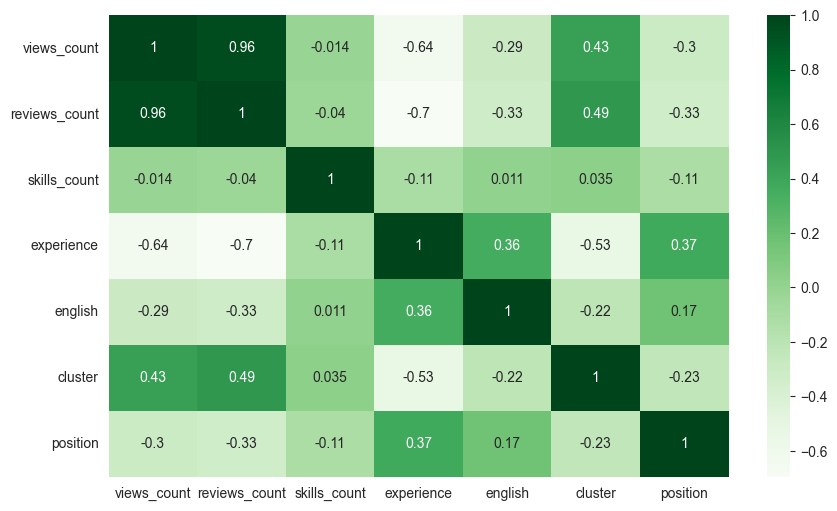

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='Greens');

# Company analyze

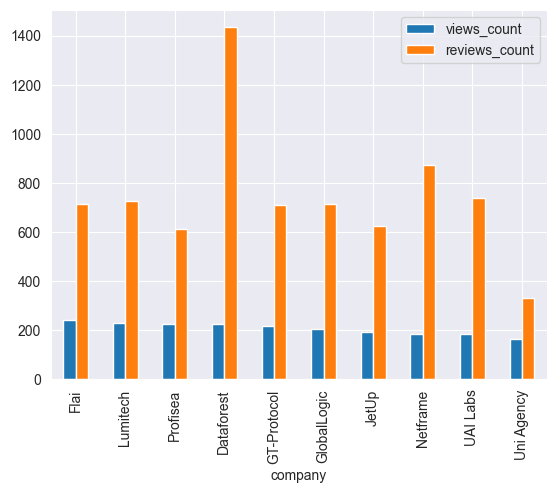

In [93]:
df.groupby('company')[['views_count', 'reviews_count']].sum().sort_values(by='views_count', ascending=False)[:10].plot(kind='bar');

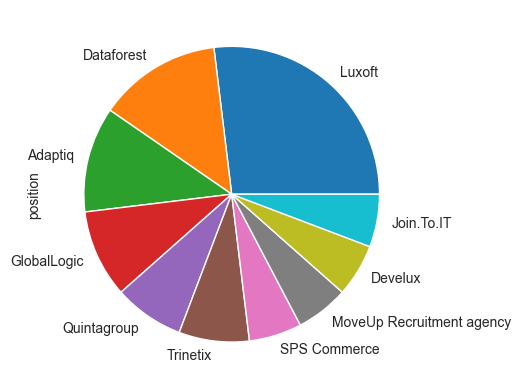

In [97]:
df.groupby('company')['position'].count().sort_values(ascending=False)[:10].plot(kind='pie');

In [130]:
top_company = df.groupby('company')['views_count'].sum().sort_values(ascending=False)[:10].index.tolist()

In [131]:
top_company = df[df['company'].isin(top_company)]

## Looks like the Dataforest is growing faster than other companies and they have big amount of vacancies with high popularity

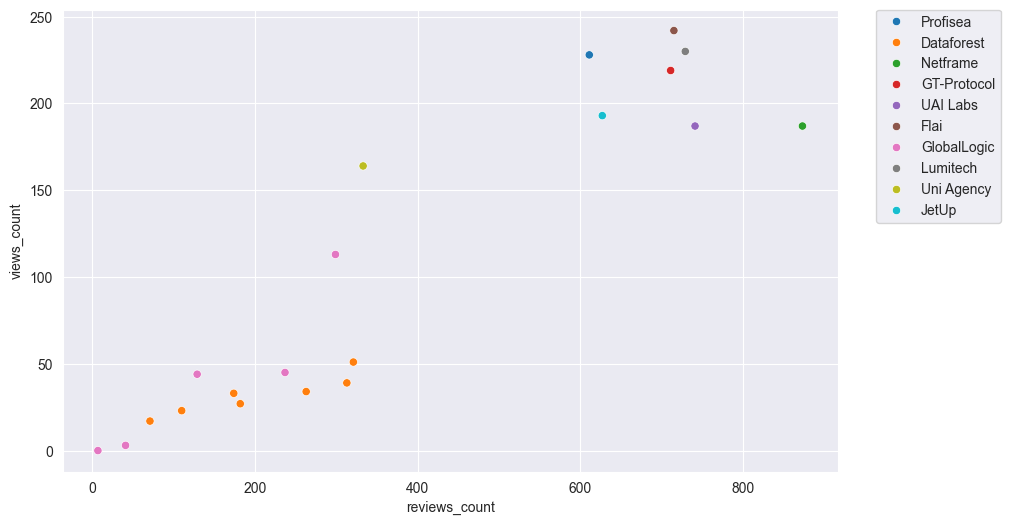

In [132]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=top_company,
                x='reviews_count',
                y='views_count',
                hue='company',
                sizes=(100, 600))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);